In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../_input/islr/Credit.csv', index_col=False)

In [17]:
df = df.iloc[:,1:]

In [23]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


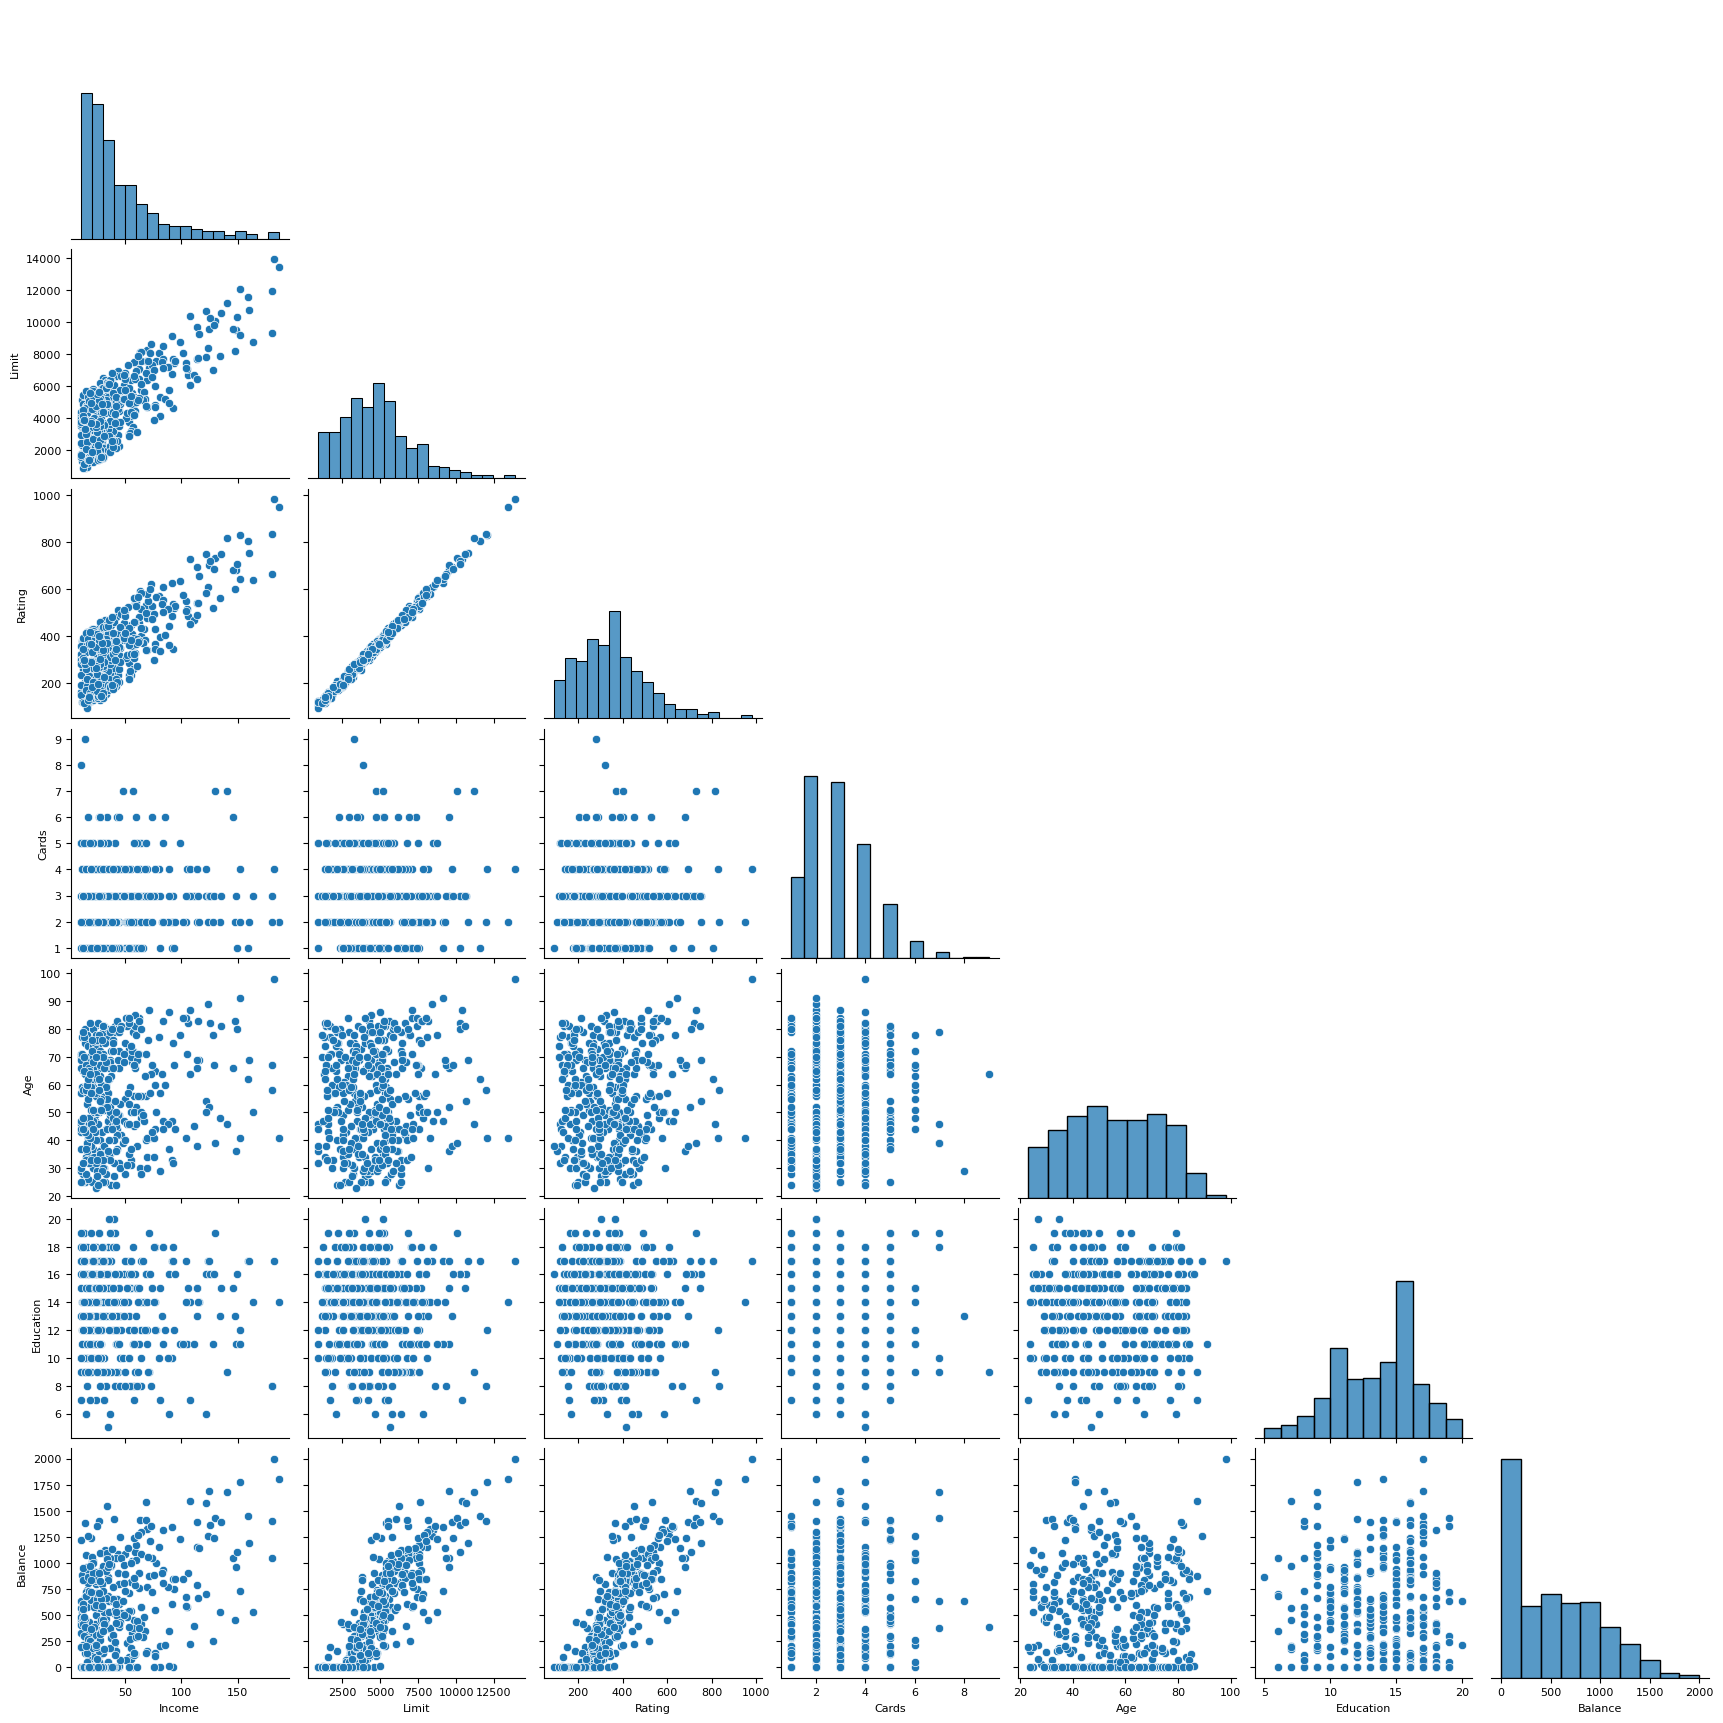

In [22]:
sns.pairplot(df, corner=True);

In [44]:
df['Gender'] = df['Gender'].str.strip()

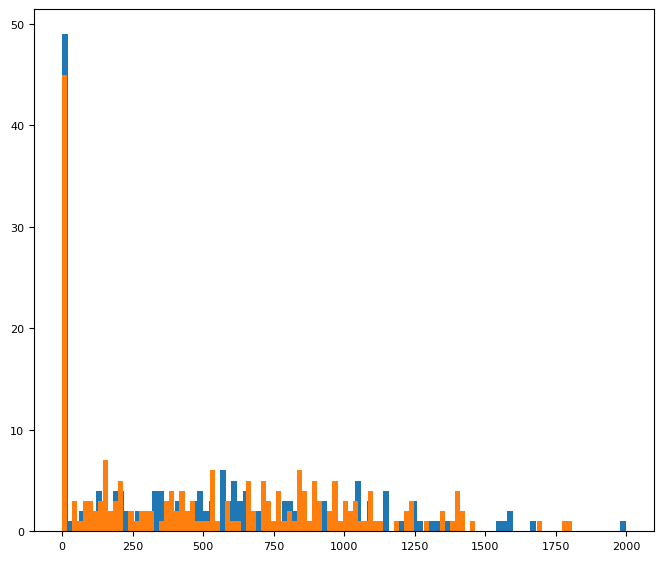

In [49]:
plt.hist('Balance', bins=100, data=df.query('Gender=="Male"'));
plt.hist('Balance', bins=100, data=df.query('Gender=="Female"'));

In [52]:
male = df.query('Gender=="Male"')['Balance']
female = df.query('Gender=="Female"')['Balance']

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
enc = OneHotEncoder()

In [93]:
enc.fit(df[['Gender']])

OneHotEncoder()

In [95]:
enc.transform(df[['Gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [ ]:
df['sex'] = np.where('')

In [61]:
b0 = male.mean()

In [62]:
b1 = female.mean()

In [60]:
import numpy as np
np.sqrt(sum((male.mean() - female)**2))

6586.284876965907